In [19]:
import pandas as pd

df = pd.read_csv("top_5000_dramas.csv")  # adjust filename if needed
print(df.shape)
print(df.columns)
df.head()


(5000, 6)
Index(['Name', 'Episodes', 'Released Year', 'Language', 'Rating', 'Ranking'], dtype='object')


,Name,Episodes,Released Year,Language,Rating,Ranking
0,Informa,10,2023,Japanese,7.6,4666
1,Gen Z,40,2023,Chinese,8.2,1166
2,The Princess Wei Young,54,2016,Chinese,8.3,815
3,When a Snail Falls in Love,21,2016,Chinese,8.2,1483
4,Liar,8,2022,Japanese,7.3,7050


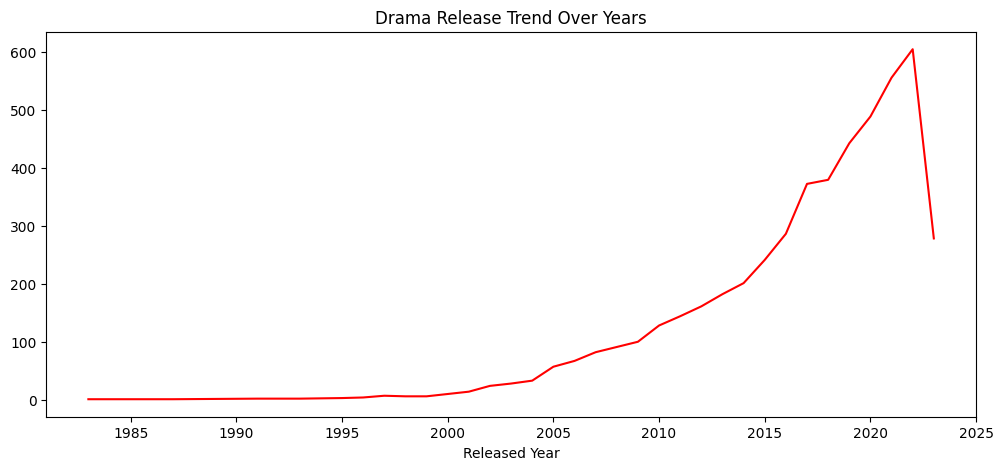

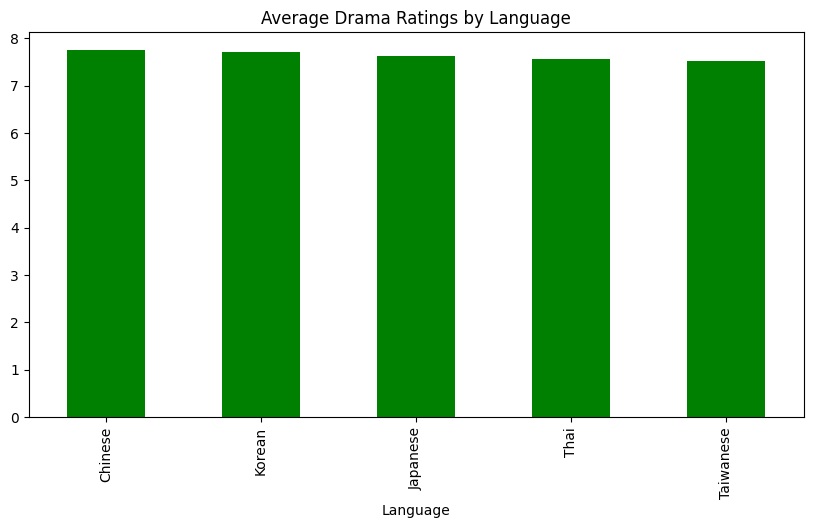

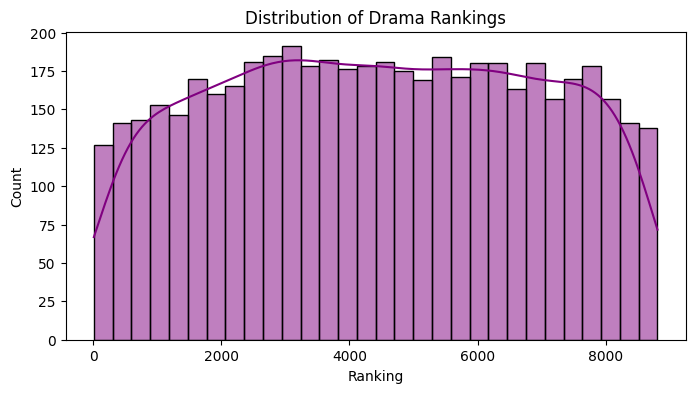

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of release years
plt.figure(figsize=(12,5))
df['Released Year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title("Drama Release Trend Over Years")
plt.show()

# Average ratings by language
plt.figure(figsize=(10,5))
df.groupby('Language')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Average Drama Ratings by Language")
plt.show()

# Ranking distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Ranking'], bins=30, kde=True, color='purple')
plt.title("Distribution of Drama Rankings")
plt.show()


In [23]:
df['features'] = (
    df['Language'].astype(str) + " " +
    df['Episodes'].astype(str) + " episodes " +
    df['Released Year'].astype(str) + " " +
    df['Rating'].astype(str) + " rating " +
    df['Ranking'].astype(str) + " ranking"
)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['features'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [26]:
def recommend_drama(title, df, cosine_sim, top_k=5):
    if title not in df['Name'].values:
        return f"Drama '{title}' not found in dataset."

    idx = df[df['Name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    for i in sim_scores[1:top_k+1]:
        recommendations.append(df.iloc[i[0]]['Name'])

    return recommendations

# Example usage
print("Recommendations for 'Winter Sonata':")
print(recommend_drama("Winter Sonata", df, cosine_sim, top_k=5))


Recommendations for 'Winter Sonata':
['We Are Dating Now', 'Romance', 'Successful Story of a Bright Girl', 'My Love Patzzi', 'Loving You']


In [32]:
import numpy as np

def precision_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    hits = len(set(recommended_at_k) & set(relevant))
    return hits / k

def recall_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    hits = len(set(recommended_at_k) & set(relevant))
    return hits / len(relevant) if relevant else 0

def ndcg_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    dcg = 0
    for i, rec in enumerate(recommended_at_k):
        if rec in relevant:
            dcg += 1 / np.log2(i+2)
    idcg = sum(1 / np.log2(i+2) for i in range(min(len(relevant), k)))
    return dcg / idcg if idcg > 0 else 0

recommended = recommend_drama("The Tale of Nokdu", df, cosine_sim, top_k=5)
print("Recommendations:", recommended)

print(df[df['Name'].isin([
    "Love in the Moonlight",
    "Moon Embracing the Sun",
    "My Love From the Star",
    "Scarlet Heart: Ryeo"
])])




Recommendations: ['Reply 1988', 'Special Labor Inspector Jo', 'One Spring Night', 'Doctor Prisoner', 'Extraordinary You']
                        Name  Episodes  Released Year Language  Rating  \
2801   Love in the Moonlight        18           2016   Korean     8.2   
4731  Moon Embracing the Sun        20           2012   Korean     8.4   

      Ranking                                         features  
2801     1199  Korean 18 episodes 2016 8.2 rating 1199 ranking  
4731      681   Korean 20 episodes 2012 8.4 rating 681 ranking  
